 ## Descarga de datos con Python

In [2]:
#Import libraries
import os
import urllib
import pandas as pd

1.  Datos recolectados de `DataMexico`  sobre educación

In [3]:
#Read excel
url1='http://cdn.datos.gob.mx/public/presidencia/Anexo_Estadistico/P287.xlsx'
edu_xcl = pd.read_excel(url1,
             header = [6],
             usecols = 'C:M'           
             )
edu_xcl.head()

,Unnamed: 2,Total,Preescolar,Primaria,Secundaria,Total.1,Profesional Técnico,Bachillerato,Total.2,Normal,Licenciatura
0,Sinaloa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-2006,89.727437,58.659436,106.756594,86.349472,72.570097,7.439837,65.130259,29.177779,0.577933,28.599847
2,2006-2007,92.601303,68.532003,105.882266,89.681766,67.041278,6.510582,60.530697,30.562641,0.526963,30.035678
3,2007-2008,93.318345,75.023587,102.014613,93.892036,67.494243,6.210548,61.283695,31.338249,0.493255,30.844993
4,2008-2009,93.281653,68.100495,104.799211,94.903201,67.633538,5.777292,61.856246,31.489117,0.475710,31.013408


In [4]:
#add column for state and check info
edu_xcl["Estado"] =""
edu_xcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 2           69 non-null     object 
 1   Total                50 non-null     float64
 2   Preescolar           50 non-null     float64
 3   Primaria             50 non-null     float64
 4   Secundaria           50 non-null     float64
 5   Total.1              50 non-null     float64
 6   Profesional Técnico  51 non-null     object 
 7   Bachillerato         50 non-null     float64
 8   Total.2              50 non-null     float64
 9   Normal               50 non-null     float64
 10  Licenciatura         50 non-null     float64
 11  Estado               75 non-null     object 
dtypes: float64(9), object(3)
memory usage: 7.2+ KB


In [6]:
#Rename first column to Periodo
edu_xcl.rename(columns ={"Unnamed: 2": "Periodo"}, inplace=True)

In [7]:
print(edu_xcl[edu_xcl.isnull().any(axis=1)])

                                              Periodo  Total  Preescolar  \
0                                             Sinaloa    NaN         NaN   
6                                                 NaN    NaN         NaN   
12                                             Sonora    NaN         NaN   
18                                                NaN    NaN         NaN   
24                                            Tabasco    NaN         NaN   
30                                                NaN    NaN         NaN   
36                                         Tamaulipas    NaN         NaN   
42                                                NaN    NaN         NaN   
48                                           Tlaxcala    NaN         NaN   
54                                                NaN    NaN         NaN   
60                                                NaN    NaN         NaN   
61  1/ Se refiere a la  relación  porcentual entre...    NaN         NaN   
62        es

#### New Dataframe


In [70]:
#Drop in new DF emptyrows
upd_edu = edu_xcl.drop([6,18,30,42,54])   
upd_edu.head()
upd_edu.rename(columns ={"Unnamed: 2": "Periodo"}, inplace='True')

In [71]:
upd_edu[45:55]

,Periodo,Total,Preescolar,Primaria,Secundaria,Total.1,Profesional Técnico,Bachillerato,Total.2,Normal,Licenciatura,Estado
49,2005-2006,91.396628,57.272909,107.686671,93.648863,58.265663,4.697907,53.567757,20.288825,2.305417,17.983408,
50,2006-2007,93.776209,69.213939,105.878335,94.495772,59.293792,4.716385,54.577408,20.403909,2.424984,17.978925,
51,2007-2008,94.325824,67.841157,106.758068,96.316970,62.063066,4.917724,57.145343,20.185871,2.411791,17.774080,
52,2008-2009,94.889820,69.621954,106.280102,97.689298,61.291152,4.816111,56.475041,20.824725,2.556443,18.268282,
53,2009-2010,94.618521,68.999680,104.501235,100.727079,63.302119,4.835598,58.466521,22.076782,2.504570,19.572212,
55,2010-2011,94.598244,68.497007,104.692284,100.645007,66.493916,5.434062,61.059854,22.724095,2.436845,20.287250,
56,2011-2012,94.430377,68.856147,104.648913,99.595558,68.449398,5.332339,63.117059,23.580442,3.157236,20.423206,
57,2012-2013,93.733631,69.535860,105.138573,95.085897,72.023851,5.717704,66.306147,24.112658,2.492945,21.619713,
58,2013-2014,94.215728,69.804628,104.066336,98.907902,72.991468,1.227689,71.763778,24.136678,1.693847,22.442831,
59,2014-2015,94.656337,70.190049,103.909959,100.562818,72.816818,1.1679,71.648918,24.476396,1.022502,23.453894,


In [72]:
#Update state by rows, maybe improve ltr
upd_edu.head()
upd_edu.loc[1:11,"Estado"]= "Sinaloa"
upd_edu.loc[12:23,"Estado"]= "Sonora"
upd_edu.loc[25:35,"Estado"]= "Tabasco"
upd_edu.loc[37:47,"Estado"]= "Tamaulipas"
upd_edu.loc[49:59,"Estado"]= "Tlaxcala"


In [73]:
#Remove state empty rows in place
upd_edu.drop([0,12,24,36,48,60], inplace = True)   


,Periodo,Total,Preescolar,Primaria,Secundaria,Total.1,Profesional Técnico,Bachillerato,Total.2,Normal,Licenciatura,Estado
1,2005-2006,89.727437,58.659436,106.756594,86.349472,72.570097,7.439837,65.130259,29.177779,0.577933,28.599847,Sinaloa
2,2006-2007,92.601303,68.532003,105.882266,89.681766,67.041278,6.510582,60.530697,30.562641,0.526963,30.035678,Sinaloa
3,2007-2008,93.318345,75.023587,102.014613,93.892036,67.494243,6.210548,61.283695,31.338249,0.493255,30.844993,Sinaloa
4,2008-2009,93.281653,68.100495,104.799211,94.903201,67.633538,5.777292,61.856246,31.489117,0.475710,31.013408,Sinaloa
5,2009-2010,93.972796,68.926784,105.776515,94.833863,71.170005,5.858836,65.311169,31.441091,0.488439,30.952652,Sinaloa
7,2010-2011,93.749197,69.884429,105.404051,93.757364,73.608892,6.022095,67.586797,32.228423,0.626733,31.601690,Sinaloa
8,2011-2012,93.532273,69.772656,105.950286,91.974093,75.737614,6.19762,69.539995,35.899673,0.875067,35.024606,Sinaloa
9,2012-2014,93.343131,70.440556,105.098620,92.318063,76.753355,6.373405,70.379950,37.413376,1.303478,36.109898,Sinaloa
10,2013-2014,93.098190,70.076061,106.209251,89.504742,82.326524,0.654374,81.672150,39.250373,1.627467,37.622905,Sinaloa
11,2014-2015,93.743456,70.479773,103.415254,97.058480,83.331670,0.601955,82.729715,40.973886,1.914510,39.059377,Sinaloa


In [75]:
#Store bottom instructions on another variable 
edu_string = upd_edu.iloc[61:76,0]
edu_string

72       3/ Incluye sólo sistema escolarizado.
73                        e/ Cifras estimadas.
74    Fuente: Secretaría de Educación Pública.
Name: Periodo, dtype: object

In [82]:
#Drop botton rows w info
#upd_edu.drop(upd_edu.tail(1).index, inplace = True)   
upd_edu.tail()

,Periodo,Total,Preescolar,Primaria,Secundaria,Total.1,Profesional Técnico,Bachillerato,Total.2,Normal,Licenciatura,Estado
55,2010-2011,94.598244,68.497007,104.692284,100.645007,66.493916,5.434062,61.059854,22.724095,2.436845,20.287250,Tlaxcala
56,2011-2012,94.430377,68.856147,104.648913,99.595558,68.449398,5.332339,63.117059,23.580442,3.157236,20.423206,Tlaxcala
57,2012-2013,93.733631,69.535860,105.138573,95.085897,72.023851,5.717704,66.306147,24.112658,2.492945,21.619713,Tlaxcala
58,2013-2014,94.215728,69.804628,104.066336,98.907902,72.991468,1.227689,71.763778,24.136678,1.693847,22.442831,Tlaxcala
59,2014-2015,94.656337,70.190049,103.909959,100.562818,72.816818,1.1679,71.648918,24.476396,1.022502,23.453894,Tlaxcala


### Chart
to work on charting the subplots by state

In [85]:
import matplotlib.pyplot as plt


(70.0, 110.0)

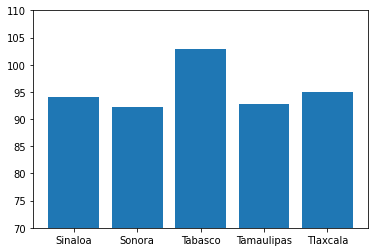

In [102]:
x_vals = upd_edu ['Estado']
y_vals = upd_edu['Total']

f, ax = plt.subplots(1,1)
ax.bar(x_vals, y_vals)
ax.set_ylim(70,110)

###  A second source for this data, an `zip` File downloaded from
https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_00_cpv2020_csv.zip

In [106]:

import datetime 
import zipfile

#Read second Datasource, 
edu_ine_url = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_00_cpv2020_csv.zip"
edu_ine__archivo = "ine2020.zip"
edu_ine2_archivo = ""
sub_edir = "./edu_data/"
if not os.path.exists(subdir + archivo_nombre):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(edu_ine_url, sub_edir + edu_ine_archivo)

In [ ]:
edu_ine = et.parse(subdir + archivo_nombre)


,citation,stdyInfo,method,dataAccs,ID,URI,fileTxt,var
19,NaN,NaN,NaN,NaN,F22,4_Fin_de_Cursos.Nesstar?Index=17&Name=Primaria...,NaN,NaN
20,NaN,NaN,NaN,NaN,F18,4_Fin_de_Cursos.Nesstar?Index=18&Name=Secundar...,NaN,NaN
21,NaN,NaN,NaN,NaN,F19,4_Fin_de_Cursos.Nesstar?Index=19&Name=Secundar...,NaN,NaN
22,NaN,NaN,NaN,NaN,F20,4_Fin_de_Cursos.Nesstar?Index=20&Name=Supervis...,NaN,NaN
23,NaN,NaN,NaN,NaN,None,None,NaN,NaN
